In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Basic Operation

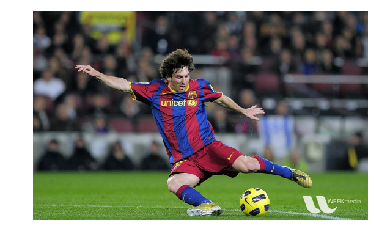

In [2]:
'''
OpenCV represents RGB images as multi-dimensional NumPy arrays…but in reverse order!

This means that images are actually represented in BGR order rather than RGB!

There’s an easy fix though.

All we need to do is convert the image from BGR to RGB
'''

img = cv2.imread('images/messi5.jpg')
# plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.axis("off")
plt.show()

### Accessing and Modifying pixel values

In [3]:
px = img[100,100]
print(px)

[156 166 200]


In [4]:
# accessing only blue pixel
blue = img[100,100,0]
blue

156

In [5]:
# you can modify the pixels values the same way.
img[100,100] = [255,255,255]
img[100,100]

array([255, 255, 255], dtype=uint8)

In [6]:
# accessing RED values
img.item(10,10,2)

59

In [7]:
# modifying RED values
img.itemset((10,10,2), 100)
img.item(10,10,2)

100

### Accessing Image Properties
Image properties include number of rows, columns and channels, type of data, number of pixels etc.
Shape of image is accessed by **img.shape**. It returns a tuple of number of rows, columns and challens(if image is color):

In [8]:
 img.shape

(342, 548, 3)

If image is grayscale, tuple teruned conains only number of rows and columns. So its a good method to check if loaded image is grayschale or color image.

Total number of pizels is access by **img.size**

Image datatype is obtained by **img.dtype**

**NOTE** `img.dtype` is very usefull while degubbing because a large nuber of erros in OpenCV-Python code is cause by invalid datatype

In [9]:
img.dtype

dtype('uint8')

### Image ROI
Sometimes, you will have to play with certain region of images. For eye detection in imagers, first perform face detection over the images until face is found, then search within the face region for eyes. This approach improves accuracy (because eyes are always on faces) and performance( because we search fo ra small area).

ROI is again obtained usign Numpy indexing.
Lets select the gall and copying it to anotehr region in the image

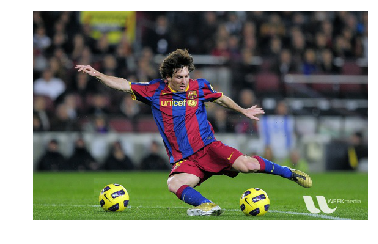

In [10]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

#plt.imshow(cv2.cvtColor(ball, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.axis("off")
plt.show()

### Splitting and Merging Image Channels
The B,G,R channels on an image can be split into their individual planes when needed. Then, the induvudual channesl can be mege back together to form a BGR image again .

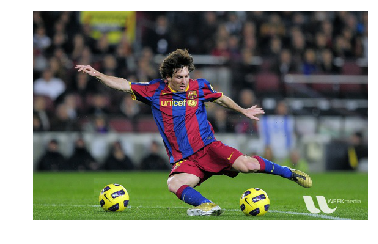

In [11]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.axis("off")
plt.show()

### Making borders for Images (padding)

IF you want to create a border around the image, something like a photo frame, you can use **cv2.copyMakeBorder()** function. But it has  application for convolutino operation, sero padding etc. This function takes following argumetns:
- **src** : input image
- **top, bottom, left, right** : border width in numbers of pizels in corresponding directions.
- **borderType**: flag definig what kind of vorder to be added. It can be the following types:
    - **cv2.BORDER_CONSTANT** : Adds a constant colored border. The value shouls be given as next argument.
    - **cv2.BORDER_REFLECT** : Border will be mirror reflection of the  border elements, line this:
        - $fedcba|abcdefgh|hgfedcb$
    - **cv2.BORDER_REFLECT_101**or** cv2.BORDER_DEFAULT** : Same as above, but with a slight  change , like this:
        -  $gfedcv|abcdefgh|gfedcba$
    - **cv2.BORDER_REPLICATE** : Last element is replicated throught, like this:
        - $aaaaa | abcdefgh  |  hhhhhh$
    - **cv2.BORDER_WRAP** : Can't explain, it will look like this:
        - $cdefgh|abcdefgh|abcdefg$
- **value** : Color of border if border type is `cv2.BORDER_CONSTANT`

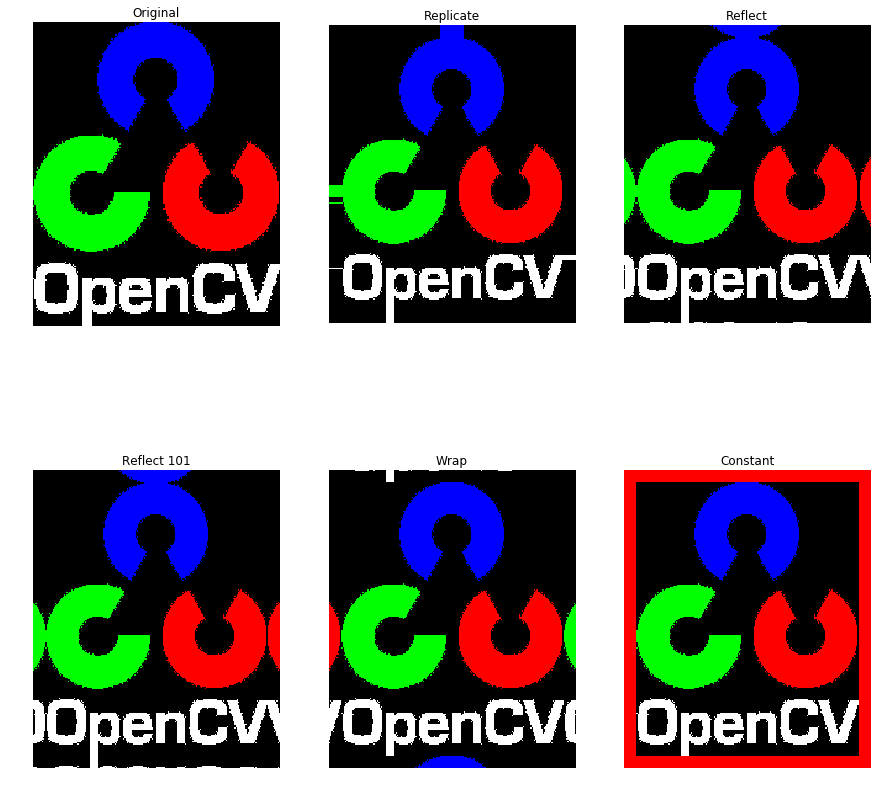

In [13]:
## 
BLUE = [255,0,0]

img1 = cv2.imread('images/opencv-logo.png')

replicate = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=BLUE)


# lets plot them
plt.figure(figsize=(15,15))

plt.subplot(2,3,1), plt.imshow(img1,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(2,3,2), plt.imshow(replicate,cmap='gray')
plt.title('Replicate'),plt.axis("off")

plt.subplot(2,3,3), plt.imshow(reflect,cmap='gray')
plt.title('Reflect'),plt.axis("off")

plt.subplot(2,3,4), plt.imshow(reflect101,cmap='gray')
plt.title('Reflect 101'),plt.axis("off")

plt.subplot(2,3,5), plt.imshow(wrap,cmap='gray')
plt.title('Wrap'),plt.axis("off")

plt.subplot(2,3,6), plt.imshow(constant,cmap='gray')
plt.title('Constant'),plt.axis("off")

plt.show()

### Arithmetic Operation on Images
##### Addition
You can add two images by OPENCV function, **cv2.add()** or simply by numy operation: $res = img1+img2$. Both images hsould be of same depth and type, or second image can jsut be a scalar value.

In [14]:
x = np.uint8([250])
y = np.uint8([10])

cv2.add(x,y)  # 250 + 10 = 260 => 255

array([[255]], dtype=uint8)